In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy.optimize as spo

In [45]:
def GetProb(p):
    p1 = p[0]
    p2 = p[1]
    P = (0.5**2)*(p1*p2+2*p1*(1-p2)+2*p2*(1-p1)+(1-p1)*(1-p2))
    return P

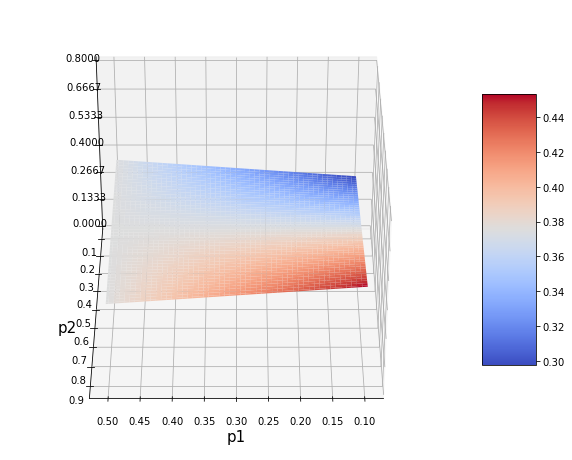

In [46]:
p1 = np.linspace(0.1,0.5,100)
p2 = np.linspace(0.1,0.9,100)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
X,Y = np.meshgrid(p1,p2)
Prob = GetProb([X,Y])
surf = ax.plot_surface(X,Y,Prob,cmap=cm.coolwarm)
ax.set_zlim(0, 0.8)
ax.zaxis.set_major_locator(LinearLocator(7))
#ax.set_zlabel('Probabilidad del Evento A (2 Caras 2 Sellos)', fontsize=15)
ax.set_xlabel('p1', fontsize=15)
ax.set_ylabel('p2', fontsize=15)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(35, 90)

In [50]:
bounds = ( (0.1,0.9),(0.1,0.5) )
p0 = [0.4,0.4]
result_min = spo.minimize( GetProb, p0, options={"disp":True}, bounds=bounds,method='SLSQP')
def f(p):
    return -GetProb(p)
result_max = spo.minimize( f, p0, options={"disp":True}, bounds=bounds,method='SLSQP')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29500000000000004
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.375
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3


In [51]:
print(result_min.x,result_min.fun)

[0.1 0.1] 0.29500000000000004


In [53]:
GetProb(result_min.x)

0.29500000000000004

In [52]:
print(result_max.x,-result_max.fun)

[0.49999999 0.49999999] 0.375
